In [105]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Исследование **данных****

Импорт данных из CSV

In [145]:
train = pd.read_csv('Train.csv')
train

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,EID_16328,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,...,type3,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839
6996,EID_8387,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,...,type3,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055
6997,EID_8077,F,49.0,3,Single,Springfield,IT,Directive,10.0,1,...,type2,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847
6998,EID_19597,F,47.0,3,Married,Washington,Sales,Behavioral,24.0,1,...,type0,2.0,4,0.7516,1.8688,2.0,3,6,3,0.4162


Размеры таблицы

In [107]:
train.shape

(7000, 24)

Проверяем на наличие пропусков

In [108]:
train.isna().any()

Employee_ID False
Gender False
Age True
Education_Level False
Relationship_Status False
Hometown False
Unit False
Decision_skill_possess False
Time_of_service True
Time_since_promotion False
growth_rate False
Travel_Rate False
Post_Level False
Pay_Scale True
Compensation_and_Benefits False
Work_Life_balance True
VAR1 False
VAR2 True
VAR3 False
VAR4 True
VAR5 False
VAR6 False
VAR7 False
Attrition_rate False
dtype: bool

В столбцах Age, Time_of_service, Pay_Scale, Work_Life_balance, VAR2, VAR4 есть пропуски

In [132]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

Заменяем NaN на среднее значение столбца

In [146]:
train['Age'] = train['Age'].fillna(train['Age'].mean())
train['Time_of_service'] = train['Time_of_service'].fillna(train['Time_of_service'].mean())
train['Pay_Scale'] = train['Pay_Scale']. fillna(train['Pay_Scale'].mean())
train['Work_Life_balance'] = train['Work_Life_balance'].fillna(train['Work_Life_balance'].mean())
train['VAR2'] = train['VAR2'].fillna(train['VAR2'].mean())
train['VAR4'] = train['VAR4'].fillna(train['VAR4'].mean())

Строим матрицу корреляции

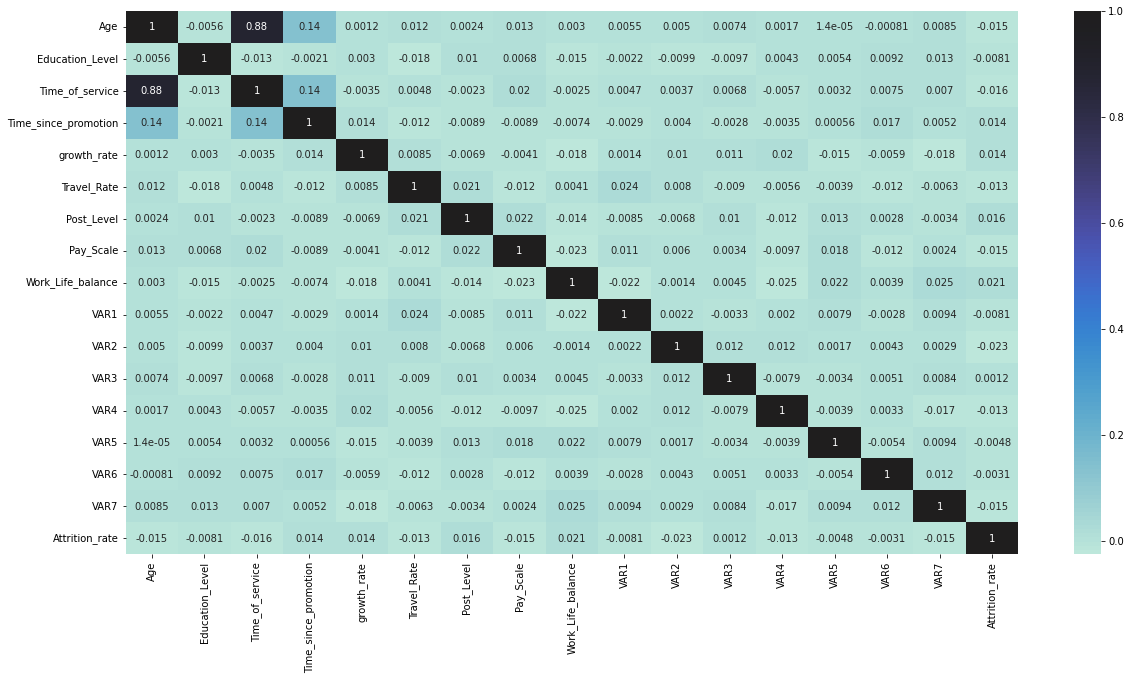

In [147]:
plt.figure(figsize=(20, 10))
cor = train.corr(numeric_only=True)
sns.heatmap(cor, annot=True, center=1)
plt.show()

Видно, что сильно коррелируют Age и Time_of_service 0.88 \
Также видно, что одинаково коррелируют (Age и Time_since_promotion) и (Time_since_promotion и Time_of_service) 0.14 \
Остальные коррелируют слабо

**Boxplot'ы для исследования выбросов**

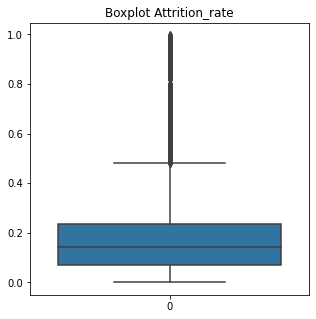

In [135]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=train['Attrition_rate'])
plt.title('Boxplot Attrition_rate')
plt.show()

У большинства рабочих скор находится между 0.1 и 0.25, но есть и те у кого больше 0.6 и вплоть до 1. они как раз и выбросы

boxplot'ы для остальных столбцов

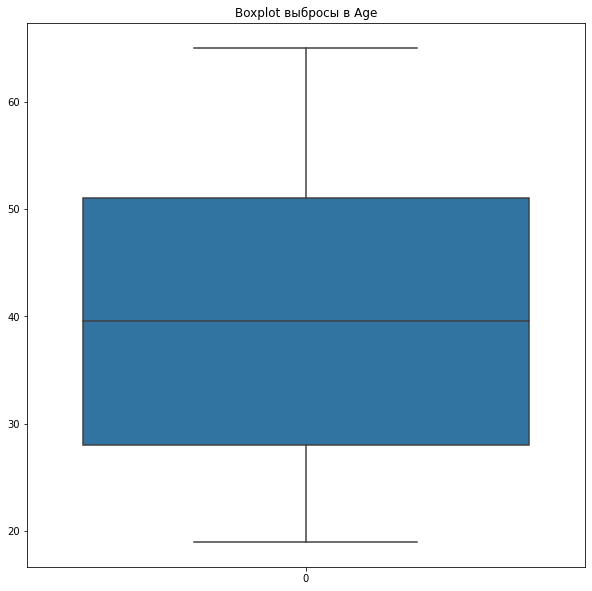

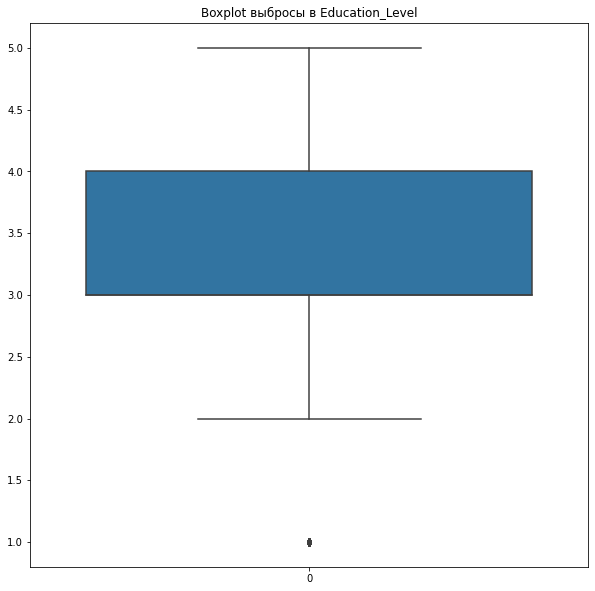

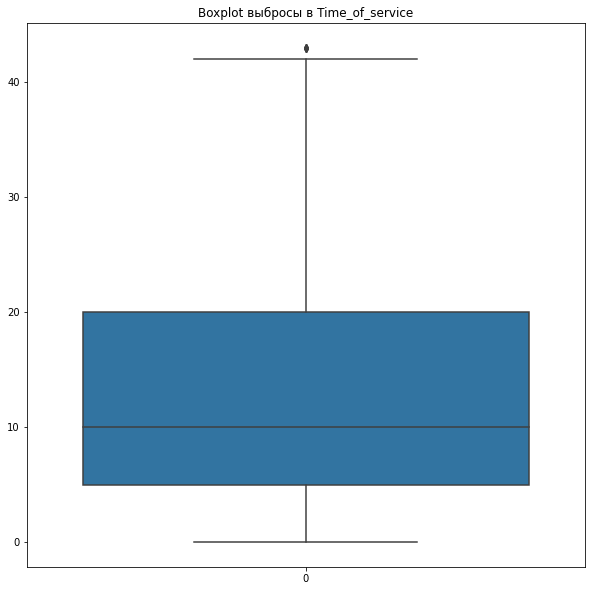

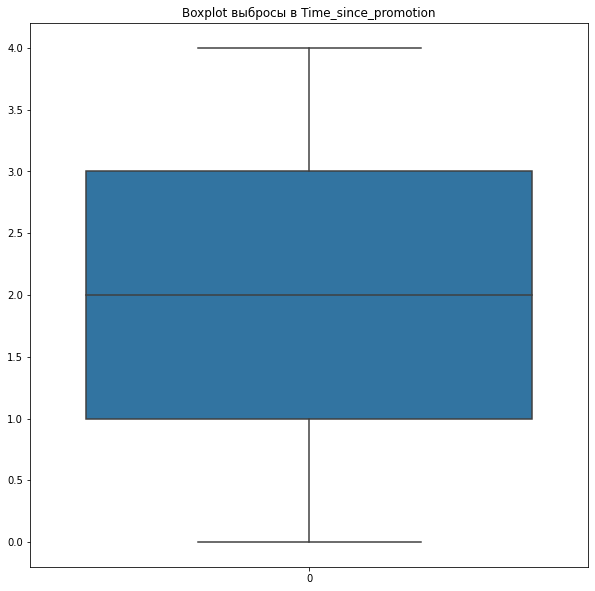

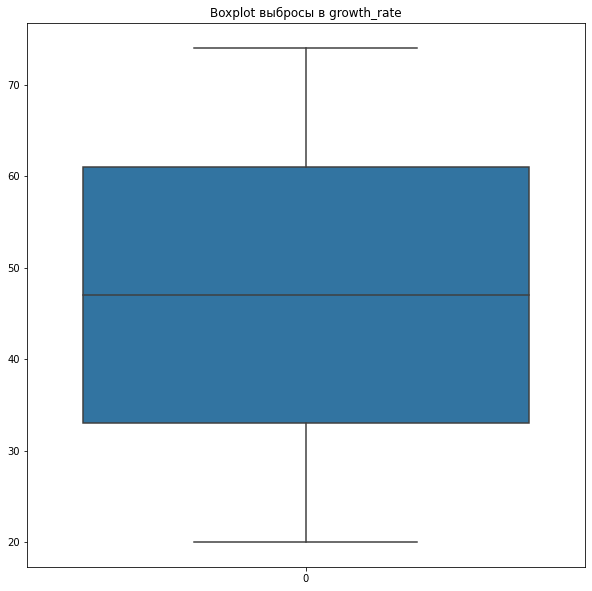

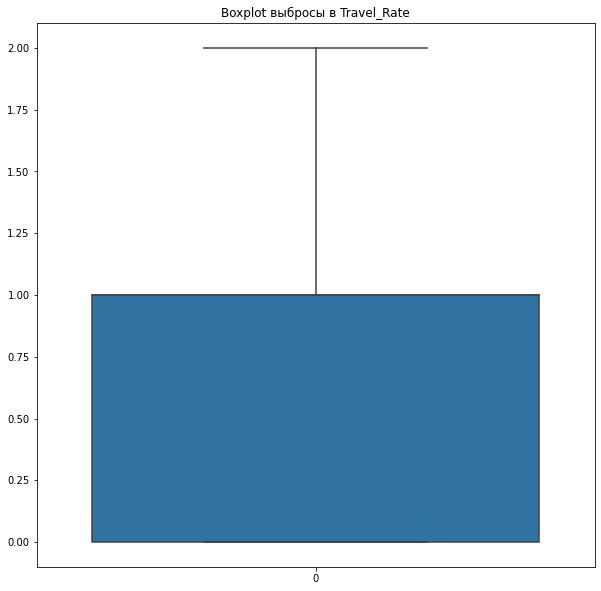

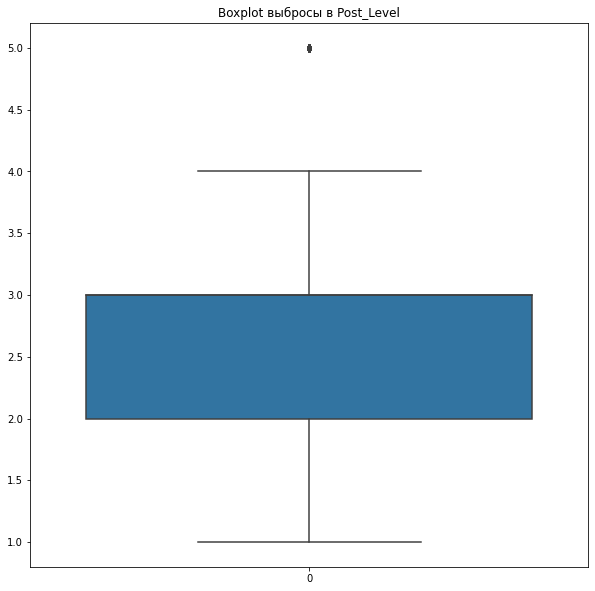

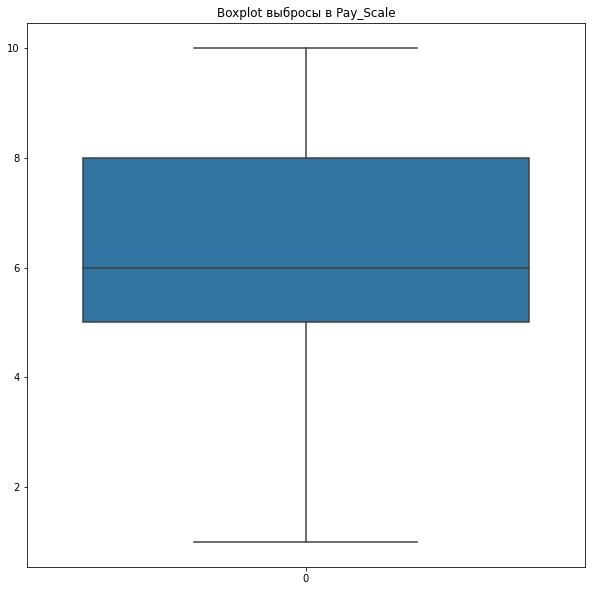

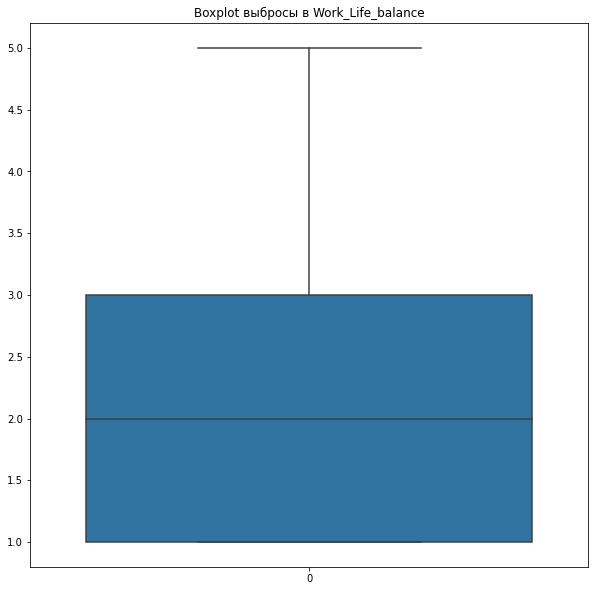

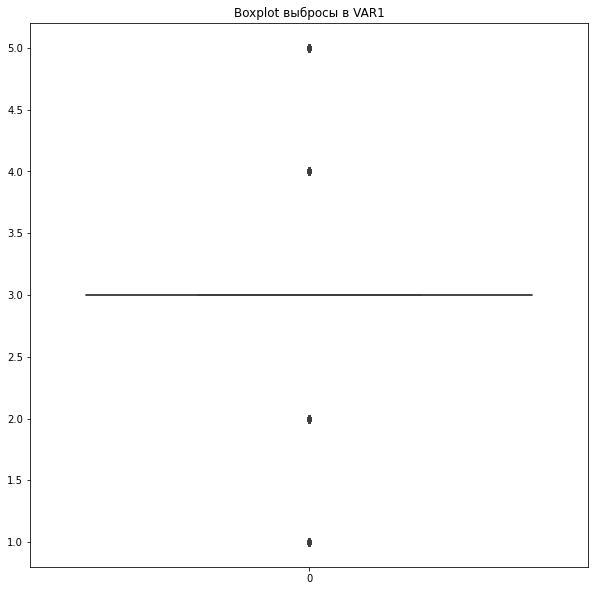

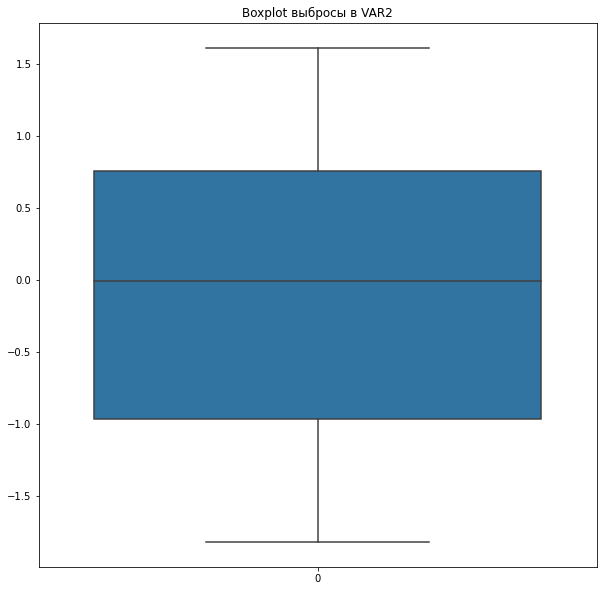

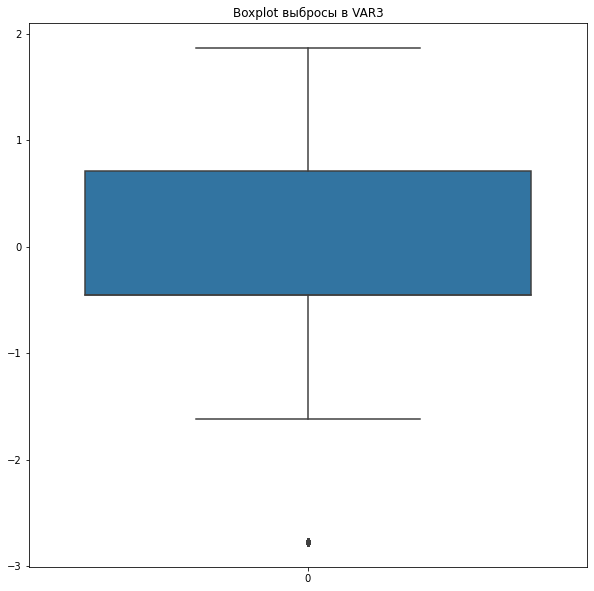

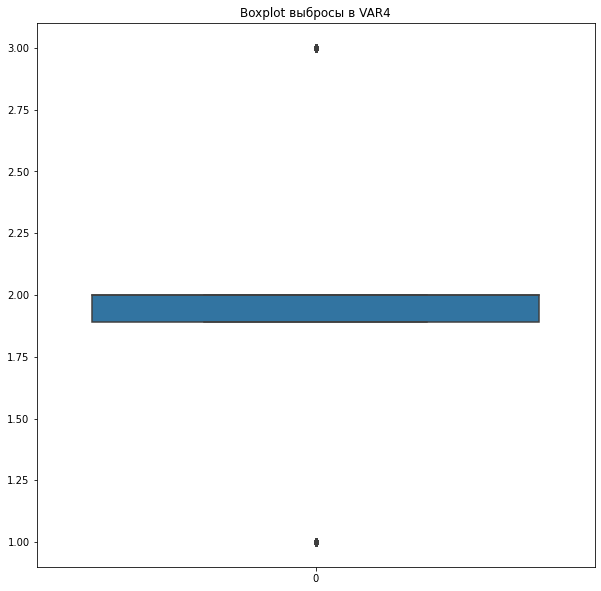

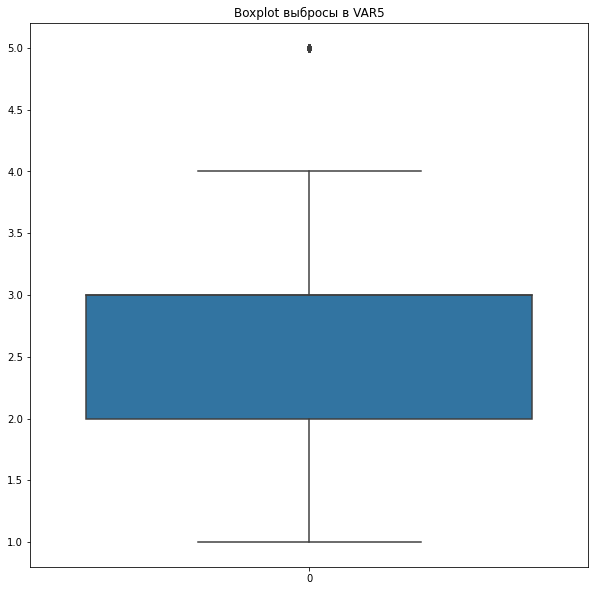

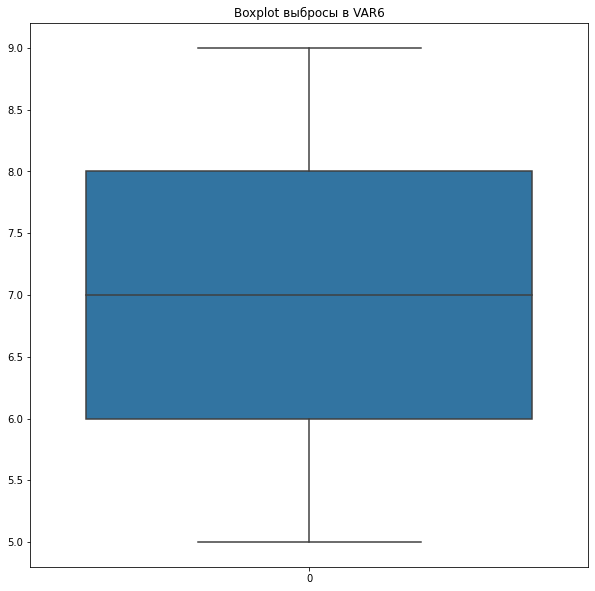

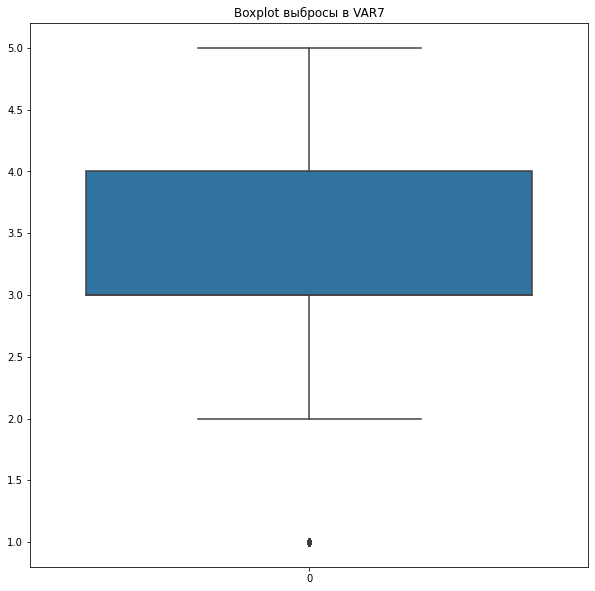

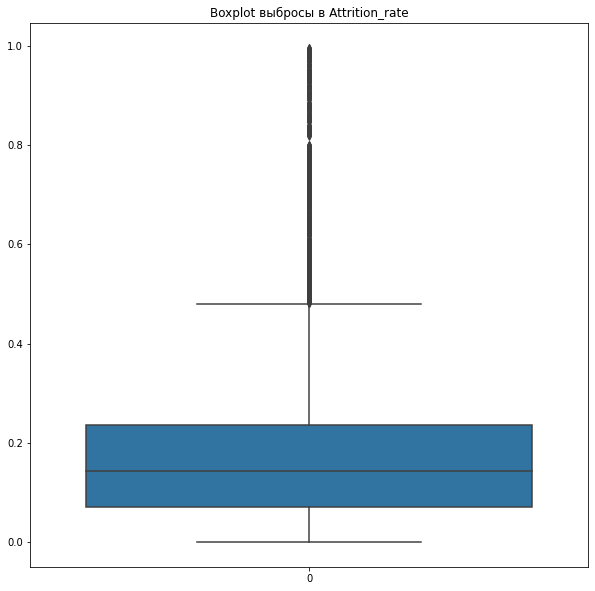

In [136]:
for i in train.drop(columns=['Employee_ID', 'Gender', 'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess', 'Compensation_and_Benefits'], axis=1):
    plt.figure(figsize=(10, 10))
    sns.boxplot(data=train[i])
    plt.title(f"Boxplot выбросы в {i}")
    plt.show()

AGE: возраст большинства рабочих между 27 и 52. выбросов нет \
Education_Level: уровень образования у большинства рабочих между 3 и 4, но есть рабочие у которых степень образования равна 1 \ 
Time_of_Service: время работы у большинства рабочих между 15 и 21. выбросов нет \
Time_since_promotion: время с повышения у большинства рабочих между 1 и 3. выбросов нет. \
growth_rate: оценка повышения у большинства рабочих между 32 до 61. выбросов нет \
Travel_rate: оценка путешествий у большинства рабочих между 0 и 1. выбросов нет \
Post_Level: должность большинства рабочих от 2 до 3, но есть рабочие с должностью 5 \
Pay_Scale: оценка зарплаты у большинства рабочих между 5 и 8. выбросов нет \
Work_Life_Balance: баланс между работой и жизнью у большинства рабочих между 1 и 3. выбросов нет \
VAR1-5: анонимные переменные не понятно на что обозначают и в основном ни на что не влияют

Берём столбцы для X

In [148]:
label = ["Attrition_rate"]
features = ['Age','Education_Level','Time_of_service','Time_since_promotion', 'growth_rate','Travel_Rate','Post_Level', 'Pay_Scale', 'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7']
featured_data = train.loc[:,features+label]
X = featured_data.loc[:,features]
y = featured_data.loc[:,label]

Разделяем данные на test и train

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.55)

Тренируем модель

In [150]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression() In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. LinearRegression LinearRegression()

Расчитываем метрики

In [151]:
y_pred = model.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))
print('Как по формуле в kaggle' ,100* max(0, 1-mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.12729640707241618
Mean Squared Error: 0.03449602220193483
R2 score: -0.007475699073415054
Как по формуле в kaggle 96.55039777980652


Абсолютная и квадратичные ошибки близки к нулю, что очень хорошо. НО R2 скор отрицательные, что говорит о том, что модель работает хуже, чем надо. Также скор ближе к нулю, чем к 1 следовательно работает почти правильно. модель обучилась плохо

Веса

In [152]:
print('Веса всех признаков (w1, ..., w16): ', model.coef_)
print('Свободный коэффицент уравнения w0:', model.intercept_)

Веса всех признаков (w1, ..., w16):  [[ 5.14232052e-04 -7.30982386e-03 -9.52233574e-04 -3.45047439e-04
  -5.23411775e-05 -4.85912131e-03  3.47472895e-03 -2.08887206e-03
  -7.89185711e-04  2.98370633e-03 -3.71010813e-03  4.92739316e-04
  -6.37171253e-03 -2.34239250e-03 -3.45933395e-03  2.47714871e-03]]
Свободный коэффицент уравнения w0: [0.24321504]


In [153]:
features = X_train.columns

coeff_df = pd.DataFrame(model.coef_[0], columns=['Coefficient'])
coeff_df['features'] = features

print(coeff_df.sort_values(by='Coefficient'))

    Coefficient              features
1     -0.007310       Education_Level
12    -0.006372                  VAR4
5     -0.004859           Travel_Rate
10    -0.003710                  VAR2
14    -0.003459                  VAR6
13    -0.002342                  VAR5
7     -0.002089             Pay_Scale
2     -0.000952       Time_of_service
8     -0.000789     Work_Life_balance
3     -0.000345  Time_since_promotion
4     -0.000052           growth_rate
11     0.000493                  VAR3
0      0.000514                   Age
15     0.002477                  VAR7
9      0.002984                  VAR1
6      0.003475            Post_Level


In [154]:
print(f'Attrition_rate = {model.intercept_[0]} +')
for l, i in enumerate(model.coef_[0]):
    print(f'{coeff_df["features"][l]} * {i} +')

Attrition_rate = 0.24321504066846775 +
Age * 0.000514232051748106 +
Education_Level * -0.007309823864763627 +
Time_of_service * -0.0009522335744025553 +
Time_since_promotion * -0.0003450474393711982 +
growth_rate * -5.2341177472591194e-05 +
Travel_Rate * -0.004859121308267674 +
Post_Level * 0.003474728946261533 +
Pay_Scale * -0.002088872060469061 +
Work_Life_balance * -0.0007891857114774513 +
VAR1 * 0.00298370633313519 +
VAR2 * -0.0037101081289397184 +
VAR3 * 0.0004927393162180166 +
VAR4 * -0.006371712532227228 +
VAR5 * -0.002342392504873916 +
VAR6 * -0.0034593339479961718 +
VAR7 * 0.002477148709686748 +


Масштабирование

Нормализация

In [155]:
from sklearn.preprocessing import MinMaxScaler

mmsc_one = MinMaxScaler()
mmsc_two = MinMaxScaler()
X_norm = mmsc_one.fit_transform(X_train) 
X_norm_train = pd.DataFrame(X_norm, columns=['Age','Education_Level','Time_of_service','Time_since_promotion', 'growth_rate','Travel_Rate','Post_Level', 'Pay_Scale', 'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7'])

y_norm = mmsc_two.fit_transform(y_train)
y_norm_train = pd.DataFrame(y_norm, columns=['Attrition_rate'])

x_norm = mmsc_one.fit_transform(X_test)
x_norm_test = pd.DataFrame(x_norm, columns=['Age','Education_Level','Time_of_service','Time_since_promotion', 'growth_rate','Travel_Rate','Post_Level', 'Pay_Scale', 'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7'])

Y_norm = mmsc_two.fit_transform(y_test)
Y_norm_test = pd.DataFrame(Y_norm, columns=['Attrition_rate'])

Тренируем модель

In [156]:
model_two = LinearRegression()
model_two.fit(X_norm_train, y_norm_train)

LinearRegression() In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. LinearRegression LinearRegression()

Метрики

In [157]:
y_pred = model.predict(x_norm_test)

print('Mean Absolute Error:', mean_absolute_error(Y_norm_test, y_pred))
print('Mean Squared Error:', mean_squared_error(Y_norm_test, y_pred))
print('R2 score:', r2_score(Y_norm_test, y_pred))
print('Как по формуле в kaggle' ,100* max(0, 1-mean_squared_error(Y_norm_test, y_pred)))

Mean Absolute Error: 0.1445277300181434
Mean Squared Error: 0.03652114974928262
R2 score: -0.051740261076147265
Как по формуле в kaggle 96.34788502507173


После нормализации средняя абсолютная ошибка не изменилась, средняя квадратная ошибка тоже не изменилась. уменьшился только R2 скор, но и тот немного. опять р2 скор отрицательный, значит модель обучилась плохо

In [158]:
features = X_norm_train.columns

coeff_df = pd.DataFrame(model.coef_[0], columns=['Coefficient'])
coeff_df['features'] = features

print(coeff_df.sort_values(by='Coefficient'))

    Coefficient              features
1     -0.007310       Education_Level
12    -0.006372                  VAR4
5     -0.004859           Travel_Rate
10    -0.003710                  VAR2
14    -0.003459                  VAR6
13    -0.002342                  VAR5
7     -0.002089             Pay_Scale
2     -0.000952       Time_of_service
8     -0.000789     Work_Life_balance
3     -0.000345  Time_since_promotion
4     -0.000052           growth_rate
11     0.000493                  VAR3
0      0.000514                   Age
15     0.002477                  VAR7
9      0.002984                  VAR1
6      0.003475            Post_Level


In [159]:
print(f'Attrition_rate = {model.intercept_[0]} +')
for l, i in enumerate(model.coef_[0]):
    print(f'{coeff_df["features"][l]} * {i} +', end=' ')

Attrition_rate = 0.24321504066846775 +
Age * 0.000514232051748106 + Education_Level * -0.007309823864763627 + Time_of_service * -0.0009522335744025553 + Time_since_promotion * -0.0003450474393711982 + growth_rate * -5.2341177472591194e-05 + Travel_Rate * -0.004859121308267674 + Post_Level * 0.003474728946261533 + Pay_Scale * -0.002088872060469061 + Work_Life_balance * -0.0007891857114774513 + VAR1 * 0.00298370633313519 + VAR2 * -0.0037101081289397184 + VAR3 * 0.0004927393162180166 + VAR4 * -0.006371712532227228 + VAR5 * -0.002342392504873916 + VAR6 * -0.0034593339479961718 + VAR7 * 0.002477148709686748 + 

Стандартизация

In [161]:
from sklearn.preprocessing import StandardScaler

mmsc_one = StandardScaler()
mmsc_two = StandardScaler()
X_std = mmsc_one.fit_transform(X_train) 
X_std_train = pd.DataFrame(X_std, columns=['Age','Education_Level','Time_of_service','Time_since_promotion', 'growth_rate','Travel_Rate','Post_Level', 'Pay_Scale', 'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7'])

y_std = mmsc_two.fit_transform(y_train)
y_std_train = pd.DataFrame(y_std, columns=['Attrition_rate'])

x_std = mmsc_one.fit_transform(X_test)
x_std_test = pd.DataFrame(x_std, columns=['Age','Education_Level','Time_of_service','Time_since_promotion', 'growth_rate','Travel_Rate','Post_Level', 'Pay_Scale', 'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7'])

Y_std = mmsc_two.fit_transform(y_test)
Y_std_test = pd.DataFrame(Y_std, columns=['Attrition_rate'])

In [162]:
model_two = LinearRegression()
model_two.fit(X_std_train, y_std_train)

LinearRegression() In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. LinearRegression LinearRegression()

In [163]:
y_pred = model.predict(x_std_test)

print('Mean Absolute Error:', mean_absolute_error(Y_std_test, y_pred))
print('Mean Squared Error:', mean_squared_error(Y_std_test, y_pred))
print('R2 score:', r2_score(Y_std_test, y_pred))
print('Как по формуле в kaggle' ,100* max(0, 1-mean_squared_error(Y_std_test, y_pred)))

Mean Absolute Error: 0.7838474463462172
Mean Squared Error: 1.0596364636836102
R2 score: -0.059636463683609975
Как по формуле в kaggle 0


После нормализации средняя абсолютная ошибка не изменилась, средняя квадратная ошибка тоже не изменилась. уменьшился только R2 скор, но и тот немного. опять р2 скор отрицательный, значит модель обучилась плохо

In [164]:
features = X_std_train.columns

coeff_df = pd.DataFrame(model.coef_[0], columns=['Coefficient'])
coeff_df['features'] = features

print(coeff_df.sort_values(by='Coefficient'))

    Coefficient              features
1     -0.007310       Education_Level
12    -0.006372                  VAR4
5     -0.004859           Travel_Rate
10    -0.003710                  VAR2
14    -0.003459                  VAR6
13    -0.002342                  VAR5
7     -0.002089             Pay_Scale
2     -0.000952       Time_of_service
8     -0.000789     Work_Life_balance
3     -0.000345  Time_since_promotion
4     -0.000052           growth_rate
11     0.000493                  VAR3
0      0.000514                   Age
15     0.002477                  VAR7
9      0.002984                  VAR1
6      0.003475            Post_Level


In [165]:
print(f'Attrition_rate = {model.intercept_[0]} +')
for l, i in enumerate(model.coef_[0]):
    print(f'{coeff_df["features"][l]} * {i} +', end=' ')

Attrition_rate = 0.24321504066846775 +
Age * 0.000514232051748106 + Education_Level * -0.007309823864763627 + Time_of_service * -0.0009522335744025553 + Time_since_promotion * -0.0003450474393711982 + growth_rate * -5.2341177472591194e-05 + Travel_Rate * -0.004859121308267674 + Post_Level * 0.003474728946261533 + Pay_Scale * -0.002088872060469061 + Work_Life_balance * -0.0007891857114774513 + VAR1 * 0.00298370633313519 + VAR2 * -0.0037101081289397184 + VAR3 * 0.0004927393162180166 + VAR4 * -0.006371712532227228 + VAR5 * -0.002342392504873916 + VAR6 * -0.0034593339479961718 + VAR7 * 0.002477148709686748 + 